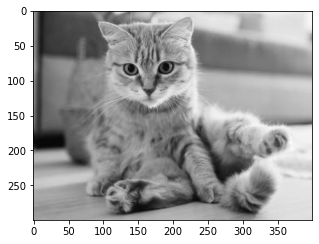

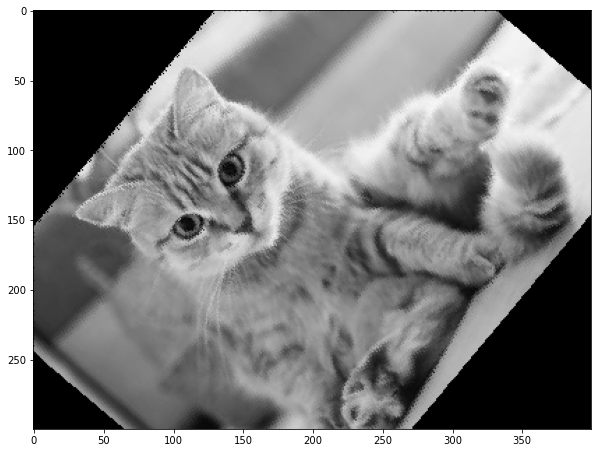

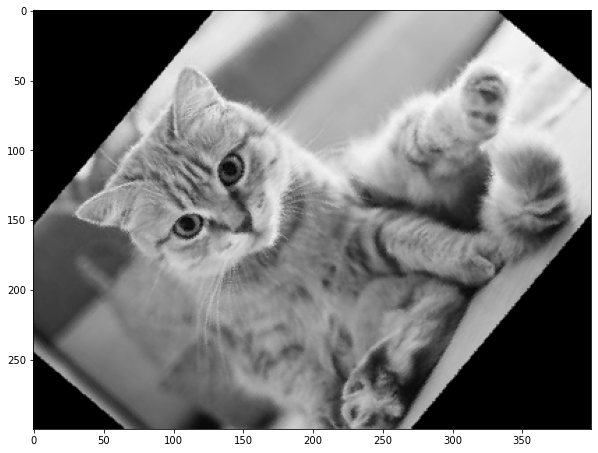

In [66]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def interpolate(image,x,y,method):
    if method=="nearest":
        image[x,y]=image[x-1,y-1]
    if method=="bilinear":
        suma=0
        cont=0
        for a in [-1,1]:
            if 0<x+a<image.shape[0]:
                suma+=image[x+a,y]
                cont+=1
            if 0<y+a<image.shape[1]:
                suma+=image[x,y+a]
                cont+=1
        image[x,y]=suma/cont
            
def rotateImage(inputImage, angle, interpolation):
    shape=inputImage.shape
    outputImage = np.zeros(shape)
    pixelCheck  = np.zeros(shape) 
    angleRad    = np.deg2rad(angle)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x=i-shape[0]/2
            y=j-shape[1]/2
            
            xp=np.cos(angleRad)*x-np.sin(angleRad)*y
            yp=np.sin(angleRad)*x+np.cos(angleRad)*y
            
            xp=xp+shape[0]/2
            yp=yp+shape[1]/2
            
            xp=round(xp)
            yp=round(yp)
            
            if 0<=xp<shape[0] and 0<=yp<shape[1]:
                outputImage[xp,yp]=inputImage[i,j]
                pixelCheck[xp,yp] = 1      
                
    for i in range(shape[0]):
        for j in range(shape[1]):
            if pixelCheck[i,j]==0:
                validation=0
                for a in [-1,1]:
                    if 0<i+a<pixelCheck.shape[0] and pixelCheck[i+a,j]==1:
                        validation=1
                    if 0<j+a<pixelCheck.shape[1] and pixelCheck[i,j+a]==1:
                        validation=1
                if validation>0:
                    interpolate(outputImage,i,j,interpolation)
    return outputImage

img = cv2.imread('img1.jpg',0)
plt.figure(1,figsize=[5, 5])
plt.imshow(img, cmap=plt.cm.gray)
plt.figure(2,figsize=[10, 10])
plt.imshow(rotateImage(img,50,"nearest"), cmap=plt.cm.gray)
plt.figure(3,figsize=[10, 10])
plt.imshow(rotateImage(img,50,"bilinear"), cmap=plt.cm.gray)

In [34]:
np.mean([1,2])

1.5